In [51]:
#!/usr/bin/python
#from pandas.io.data import DataReader
#from datetime import datetime
from pandas_datareader import data
import pandas_datareader as pdr
from datetime import datetime
import urllib.request
import zipfile 
import io
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import random
import yahoo_finance
import os

In [52]:
"Here the complexity comes from cleaning the data and preparing it for Analysis, We use the magic from Pandas library"
"to overcome the complexity. We download and upload the raw data from yahoo finance and clean it."

'to overcome the complexity. We download and upload the raw data from yahoo finance and clean it.'

In [53]:
#DAX Germany Index
daxfile = os.path.join('C:/Users/tanjo/Downloads/Final Project_JS_Groupo/^GDAXI.csv')
DAX = pd.read_csv(daxfile,sep=',')
#S&P 500 American Index
sp500file = os.path.join('C:/Users/tanjo/Downloads/Final Project_JS_Groupo/^GSPC.csv')
SP500 = pd.read_csv(sp500file,sep=',')
#IBOVESPA Brazilian Index
bvspfile = os.path.join('C:/Users/tanjo/Downloads/Final Project_JS_Groupo/^BVSP.csv')
BVSP = pd.read_csv(bvspfile,sep=',')
#CAC40 The French Index
cac40file = os.path.join('C:/Users/tanjo/Downloads/Final Project_JS_Groupo/^FCHI.csv')
CAC40 = pd.read_csv(cac40file,sep=',')
# HSI Hang SENG (Hong Kong) Index
hsifile = os.path.join('C:/Users/tanjo/Downloads/Final Project_JS_Groupo/^HSI.csv')
HSI = pd.read_csv(hsifile,sep=',')

In [54]:
# here we save the data into a new variables so that we can easly manipulate without changing the original data
hsi=HSI
dax=DAX
bvsp=BVSP
cac40=CAC40
sp500=SP500

In [55]:
#Here we delete the columns that we are not interested in, and rename the variables of the Adj Close columns 
hsi=hsi.drop(hsi.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Date':'DateHSI','Adj Close':'HSI'})
dax=dax.drop(dax.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Date':'DateDAX','Adj Close':'DAX'})
bvsp=bvsp.drop(bvsp.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Date':'DateBVSP','Adj Close':'BVSP'})
cac40=cac40.drop(cac40.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Date':'DateCAC40','Adj Close':'CAC40'})
sp500=sp500.drop(sp500.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Date':'DateSP00','Adj Close':'SP500'})

In [56]:
#Printing the dimension of our data checking the existence in different trading days, per each country
print('size of HSI', hsi.shape)
print('size of BVSP',bvsp.shape)
print('size of DAX',dax.shape)
print('size of CAC40',cac40.shape)
print('size of SP500',sp500.shape)

size of HSI (4791, 2)
size of BVSP (4807, 2)
size of DAX (4879, 2)
size of CAC40 (4898, 2)
size of SP500 (4781, 2)


In [57]:
#Taking the Adj Close and the Date column in our datasets
H=HSI.drop(HSI.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Adj Close':'HSI'})
C=CAC40.drop(CAC40.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Adj Close':'CAC40'})
B=BVSP.drop(BVSP.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Adj Close':'BVSP'})
D=DAX.drop(DAX.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Adj Close':'DAX'})
S=SP500.drop(SP500.columns[[1,2, 3, 4,6]], axis=1).rename(columns={'Adj Close':'SP500'})

In [58]:
#Merging all the dataset with the datasets that has the longest column
b=pd.merge(C,B,left_on='Date',right_on='Date',how='left')
d=pd.merge(C,D,left_on='Date',right_on='Date',how='left')
h=pd.merge(C,H,left_on='Date',right_on='Date',how='left')
s=pd.merge(C,S,left_on='Date',right_on='Date',how='left')

In [59]:
# Concatinating the data afte merging it With CAC40
da=pd.concat([b,d,h,s],axis=1)

In [60]:
#Visualising the data
da.columns

Index(['Date', 'CAC40', 'BVSP', 'Date', 'CAC40', 'DAX', 'Date', 'CAC40', 'HSI',
       'Date', 'CAC40', 'SP500'],
      dtype='object')

In [61]:
#Renaming the columns 
da.columns=['Date', 'CAC40', 'BVSP', 'Date1', 'CAC401', 'DAX', 'Date2', 'CAC402', 'HSI',
       'Date3', 'CAC403', 'SP500']

In [62]:
#Dropping the duplicate columns due to the pd.concat function
da=da.drop(da.columns[[3,4,6,7,9,10]], axis=1)

In [63]:
#checking if there is NaN in our datasets; 
da.isnull().sum()

Date       0
CAC40     53
BVSP     216
DAX       78
HSI      215
SP500    146
dtype: int64

In [64]:
# However we have seen that that sum data, was having blanks represented by null. 
da.iloc[60:100]

,Date,CAC40,BVSP,DAX,HSI,SP500
60,1998-03-27,3810.199951,11900.0,5066.899902,11735.500000,1095.439941
61,1998-03-30,3800.199951,11750.0,5069.899902,11503.799805,1093.599976
62,1998-03-31,3875.300049,11947.0,5097.299805,11518.700195,1101.750000
63,1998-04-01,3883.300049,11837.0,5135.399902,11331.400391,1108.150024
64,1998-04-02,3935.899902,11858.0,5179.000000,11189.700195,1120.010010
65,1998-04-03,3932.000000,11634.0,5254.299805,11052.700195,1122.699951
66,1998-04-06,3986.800049,11948.0,5345.899902,NaN,1121.380005
67,1998-04-07,3903.300049,11847.0,5309.700195,11049.400391,1109.550049
68,1998-04-08,3873.899902,11975.0,5267.399902,11314.500000,1101.650024
69,1998-04-09,3894.500000,NaN,5312.299805,11342.000000,1110.670044


In [65]:
#Then we replace the null(blank spaces)
# with NaN. the NaN represets the differences in trading days for each countries compared 
# to CAC40 (France), for example: America trade 146 days less compared to France for the past 19 years(1998-2016).
da=da.replace('null',np.NaN)
da.isnull().sum()


Date       0
CAC40     53
BVSP     216
DAX       78
HSI      215
SP500    146
dtype: int64

In [66]:
#we used fillna function to fill the NaN values and front fill method, this is because the data is missing due to the
#the differences in trading days, clearly if the stock market is closed there no changes on the prices, the last closing 
#price becomes the next closing price if there NaN
da=da.fillna(method='ffill')

In [67]:
#The NaN has been filled 
da.isnull().sum()

Date     0
CAC40    0
BVSP     0
DAX      0
HSI      0
SP500    0
dtype: int64

In [68]:
# This checks the columns if they have been filled correctly, focus can be directed to the following rows: (HSI:66,70,77),
# (CAC40,DAX: 70,71), (BVSP:69,70), (SP500:70)
da.iloc[60:100]

,Date,CAC40,BVSP,DAX,HSI,SP500
60,1998-03-27,3810.199951,11900.0,5066.899902,11735.500000,1095.439941
61,1998-03-30,3800.199951,11750.0,5069.899902,11503.799805,1093.599976
62,1998-03-31,3875.300049,11947.0,5097.299805,11518.700195,1101.750000
63,1998-04-01,3883.300049,11837.0,5135.399902,11331.400391,1108.150024
64,1998-04-02,3935.899902,11858.0,5179.000000,11189.700195,1120.010010
65,1998-04-03,3932.000000,11634.0,5254.299805,11052.700195,1122.699951
66,1998-04-06,3986.800049,11948.0,5345.899902,11052.700195,1121.380005
67,1998-04-07,3903.300049,11847.0,5309.700195,11049.400391,1109.550049
68,1998-04-08,3873.899902,11975.0,5267.399902,11314.500000,1101.650024
69,1998-04-09,3894.500000,11975.0,5312.299805,11342.000000,1110.670044


In [69]:
for i in range(1,6):
    da[da.columns[i]]=da[da.columns[i]].astype(float)
da[da.columns[4]].dtype

dtype('float64')

In [70]:
# Writting the data to the CSV file so that it can be exported to R for modelling
da.to_csv('C:/Users/tanjo/Downloads/Final Project_JS_Groupo/Data.csv', sep=',')

In [71]:
#for i in range(1,6):
#    for j in range(1,len(da)):
#        if (da[da.columns[i]].iloc[j]!=np.nan):
#            da
#            da[da.columns[i]].iloc[j]=da[da.columns[i]].iloc[j-1]   
            
#for i in range(1,6):
#    for j in range(1,len(da)):
#        if (da[da.columns[i]].iloc[j]!=np.nan):
#            da[da.columns[i]].iloc[j]=da[da.columns[i]].iloc[j-1]             
#for i in range(1,6):
#    num_df = (da.drop(da.columns[i], axis=1).join(da[da.columns[i]].apply(pd.to_numeric, errors='coerce')))
#num_df

In [72]:

#Descriptive statistics
da.describe()

,CAC40,BVSP,DAX,HSI,SP500
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,4270.472297,37888.505308,6426.366277,17463.184841,1356.285659
std,887.466576,20718.433238,2130.274262,5257.094150,347.798564
min,2403.040039,4761.000000,2202.959961,6660.419922,676.530029
25%,3643.290039,15251.500000,4904.432618,12975.967285,1120.325043
50%,4184.229981,41291.000000,6085.109863,17746.330078,1283.090027
75%,4773.109985,56279.000000,7504.770020,22100.914551,1469.392456
max,6922.330078,73517.000000,12374.730469,31638.220703,2271.719971


array([[<AxesSubplot:title={'center':'CAC40'}>,
        <AxesSubplot:title={'center':'BVSP'}>],
       [<AxesSubplot:title={'center':'DAX'}>,
        <AxesSubplot:title={'center':'HSI'}>],
       [<AxesSubplot:title={'center':'SP500'}>, <AxesSubplot:>]],
      dtype=object)

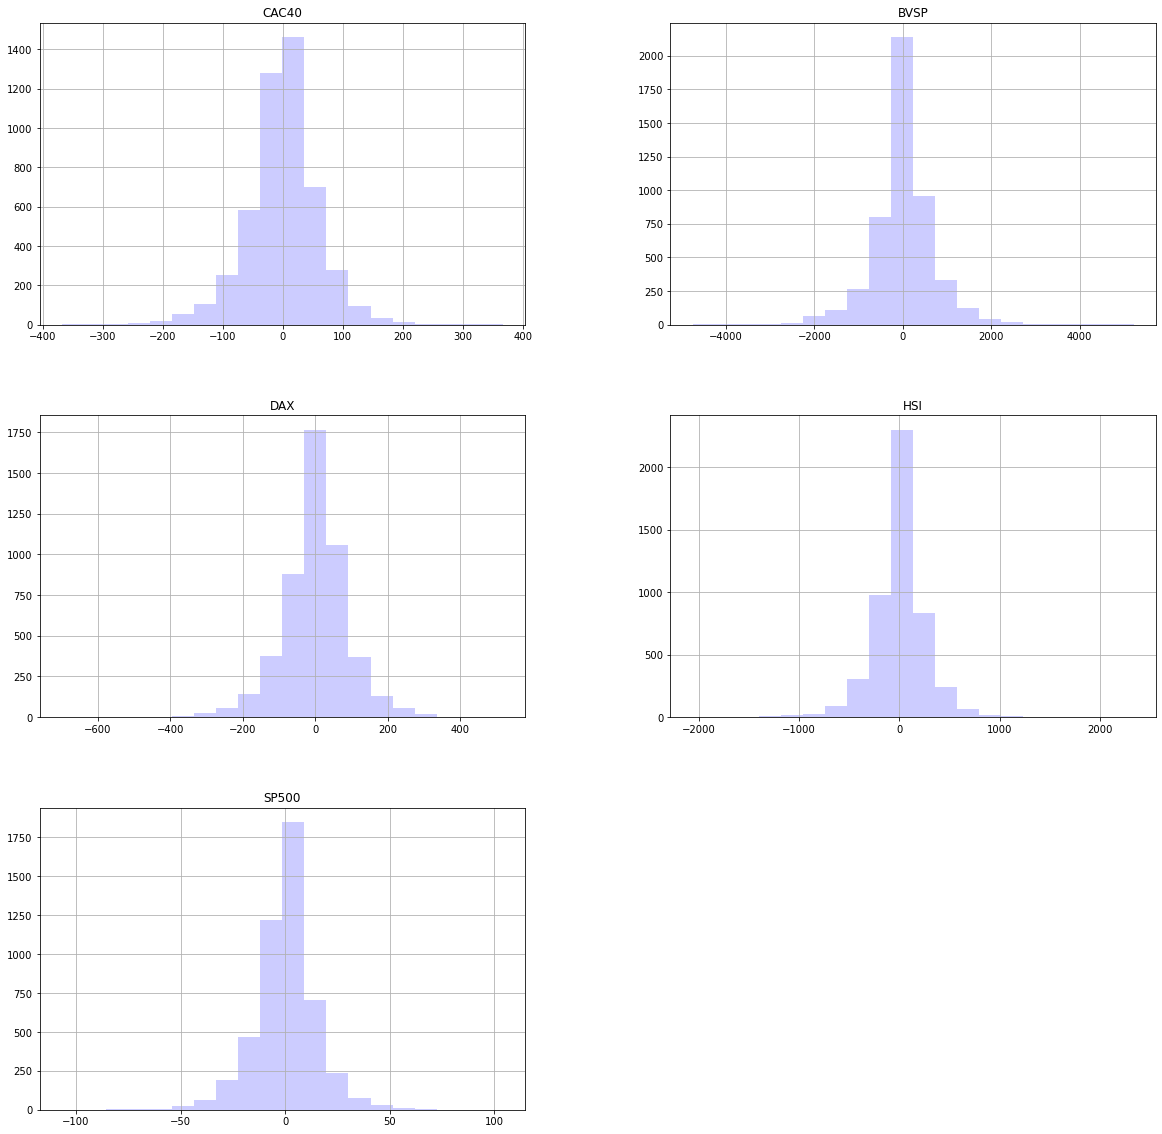

In [73]:
%matplotlib inline
# The Histogram plots for all the stocks
#for i in range(1,6):
da[da.columns[1:6]].diff().hist(color='b', alpha=0.2, bins=20,figsize=(20,20))


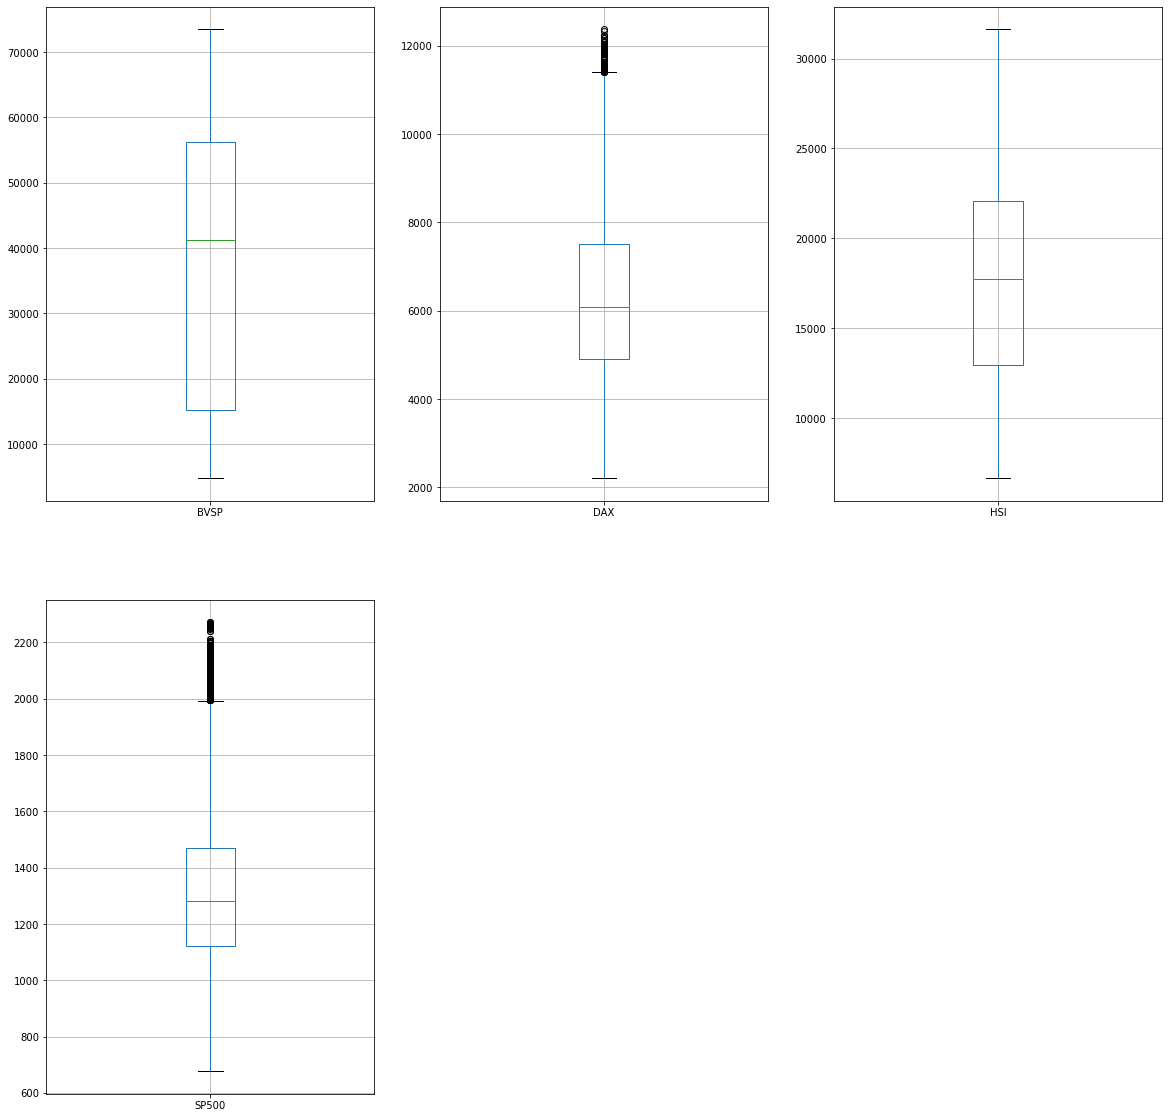

In [74]:
#Box plots our variables
data=da.drop(da.columns[[0]], axis=1)#dropping the date columns
plt.figure(1,figsize=(20,20))
for i in range(1,5):
    plt.grid(True)
    plt.subplot(2,3,i)
    data[data.columns[i]].plot.box()

plt.grid(True)
plt.show()

In [75]:
#checking the correlation matrix of our data
c_ij = da.corr()
c_ij

,CAC40,BVSP,DAX,HSI,SP500
CAC40,1.000000,-0.057254,0.433230,0.256611,0.424454
BVSP,-0.057254,1.000000,0.577952,0.900984,0.427238
DAX,0.433230,0.577952,1.000000,0.794165,0.944622
HSI,0.256611,0.900984,0.794165,1.000000,0.675383
SP500,0.424454,0.427238,0.944622,0.675383,1.000000


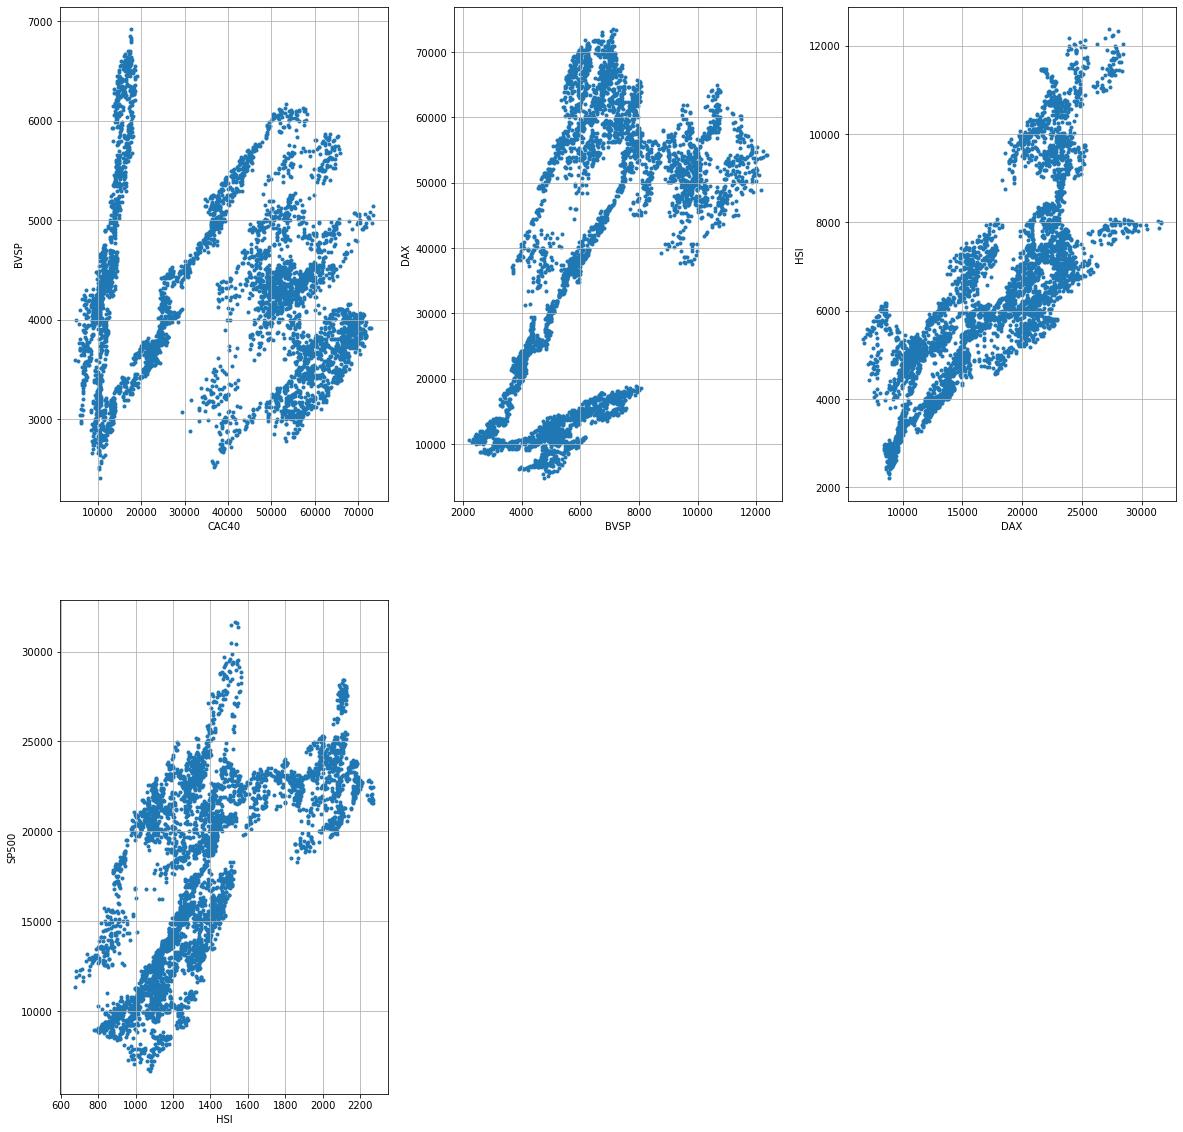

In [76]:

plt.figure(1,figsize=(20,20))
for i in range(1,5):
    plt.grid(True)
    plt.subplot(2,3,i)
    plt.scatter(data[data.columns[i]],data[data.columns[i-1]],marker='.')
    plt.xlabel(data.columns[i-1])
    plt.ylabel(data.columns[i])

plt.grid(True)
plt.show()

In [77]:
y=np.log(da[da.columns[1:6]]).diff()#calculating returns

In [78]:
t=da[da.columns[0]]#Getting the date column 

In [79]:
da=pd.concat([t,y],axis=1)# puting the data together

In [80]:
DATA = da.drop(da.index[0]).head() #removing the first row with NA's after calculating returns

In [90]:
da.head()
DATA.shape

(5, 6)

In [82]:
da.shape

(4898, 6)

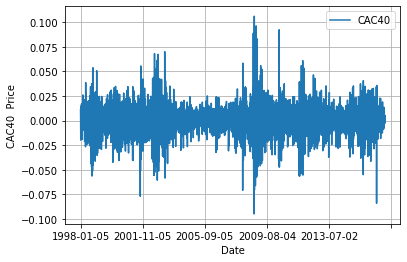

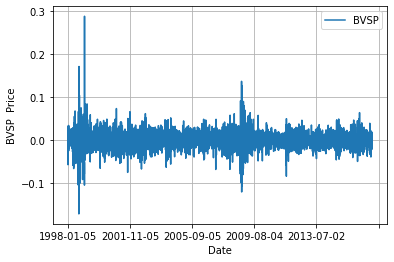

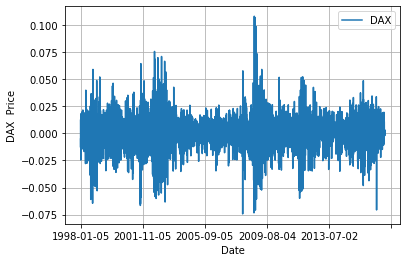

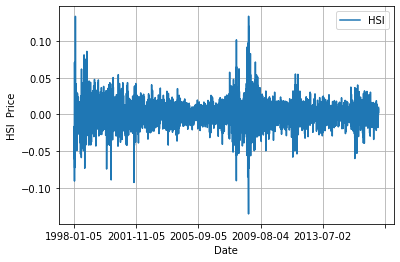

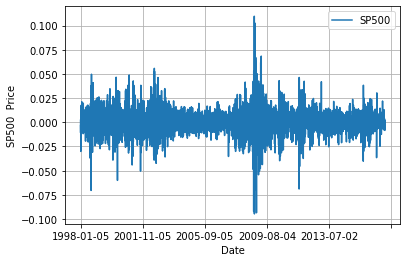

In [83]:
#Ploting the time series of our stocks
for i in range(1,6):
    #plt.subplot(2,3,i)
    da.pivot_table(da.columns[i], index='Date').plot()
    plt.ylabel(da.columns[i]+'  '+'Price');
    plt.grid(True)
plt.show()

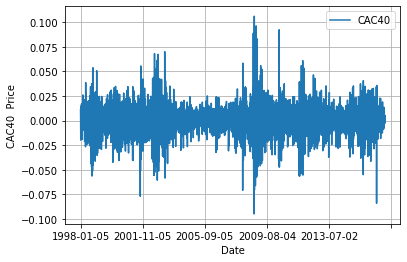

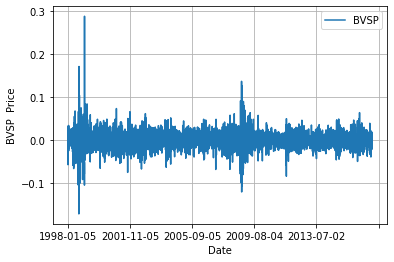

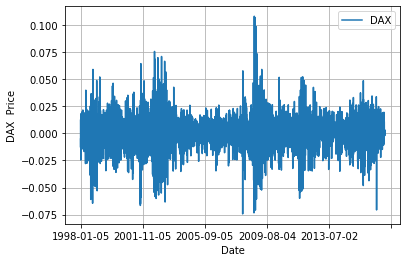

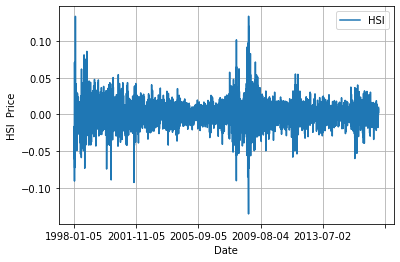

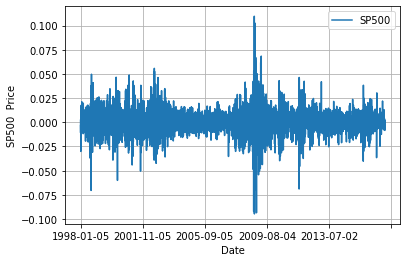

In [91]:
for i in range(1,6):
    da.pivot_table(da.columns[i], index='Date').plot()
    plt.ylabel(da.columns[i]+'  '+'Price');
    plt.grid(True)
plt.show()

In [96]:
# Writting the data to the CSV file so that it can be exported to R for modelling
da.to_csv('C:/Users/tanjo/Downloads/Siya_Machine_Learning/Machine-Learning/Final Project_JS_Groupo/dataR.csv', sep=',')

In [93]:
da.describe()# for returns: NB CAC40 mean and STD

,CAC40,BVSP,DAX,HSI,SP500
count,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000
mean,0.000096,0.000357,0.000198,0.000148,0.000170
std,0.014799,0.019866,0.015311,0.015862,0.012284
min,-0.094715,-0.172082,-0.074335,-0.135820,-0.094695
25%,-0.007096,-0.009726,-0.007195,-0.006870,-0.005172
50%,0.000323,0.000000,0.000630,0.000000,0.000258
75%,0.007798,0.010924,0.008079,0.007610,0.005832
max,0.105946,0.288325,0.107975,0.134068,0.109572


In [94]:
da.shape

(4898, 6)

In [88]:
" Now we can run the models using our data: then it a good time to check R code  "

' Now we can run the models using our data: then it a good time to check R code  '